<a href="https://colab.research.google.com/github/haroonr1929/Haroon_INSE_6220_Project/blob/main/Principal_Component_Analysis_and_Data_for_Admission_in_University.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and Data for Admission in University**

**Install Pycaret**

In [120]:

#!pip install pycaret==3.0.0
!pip install --use-deprecated=legacy-resolver pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [62]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

This dataset includes various parameter such as SOP, University ratings, GRE, TOEFL,LOR, CGPA, Class.
this dataset includes 401 rows and 7 Columns.
originally in the dataset the class was renaimed as research which  
**0 and 1 represents research experience of the cureent students.**


All attributes are numerical and they are listed bellow:

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose (SOP)
5. Letter of Recommendation (LOR) Strength ( out of 5 )
6. CGPA ( out of 10 )
7. Research Experience, Class ( either 0 or 1 )



The original dataset can be found on below link:
https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university





In [63]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/haroonr1929/Haroon_INSE_6220_Project/main/adm_data.csv')
df.head(25)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Class
0         337          118                  4  4.5   4.5  9.65      1
1         324          107                  4  4.0   4.5  8.87      1
2         316          104                  3  3.0   3.5  8.00      1
3         322          110                  3  3.5   2.5  8.67      1
4         314          103                  2  2.0   3.0  8.21      0
5         330          115                  5  4.5   3.0  9.34      1
6         321          109                  3  3.0   4.0  8.20      1
7         308          101                  2  3.0   4.0  7.90      0
8         302          102                  1  2.0   1.5  8.00      0
9         323          108                  3  3.5   3.0  8.60      0
10        325          106                  3  3.5   4.0  8.40      1
11        327          111                  4  4.0   4.5  9.00      1
12        328          112                  4  4.0   4.5  9.10      1
13        307          109                  3  4.0   3.0  8.00      1
14        311          104                  3  3.5   2.0  8.20      1
15        314          105                  3  3.5   2.5  8.30      0
16        317          107                  3  4.0   3.0  8.70      0
17        319          106                  3  4.0   3.0  8.00      1
18        318          110                  3  4.0   3.0  8.80      0
19        303          102                  3  3.5   3.0  8.50      0
20        312          107                  3  3.0   2.0  7.90      1
21        325          114                  4  3.0   2.0  8.40      0
22        328          116                  5  5.0   5.0  9.50      1
23        334          119                  5  5.0   4.5  9.70      1
24        336          119                  5  4.0   3.5  9.80      1

In [64]:
len(df.index)

400

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Class              400 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 22.0 KB


In [66]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [67]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

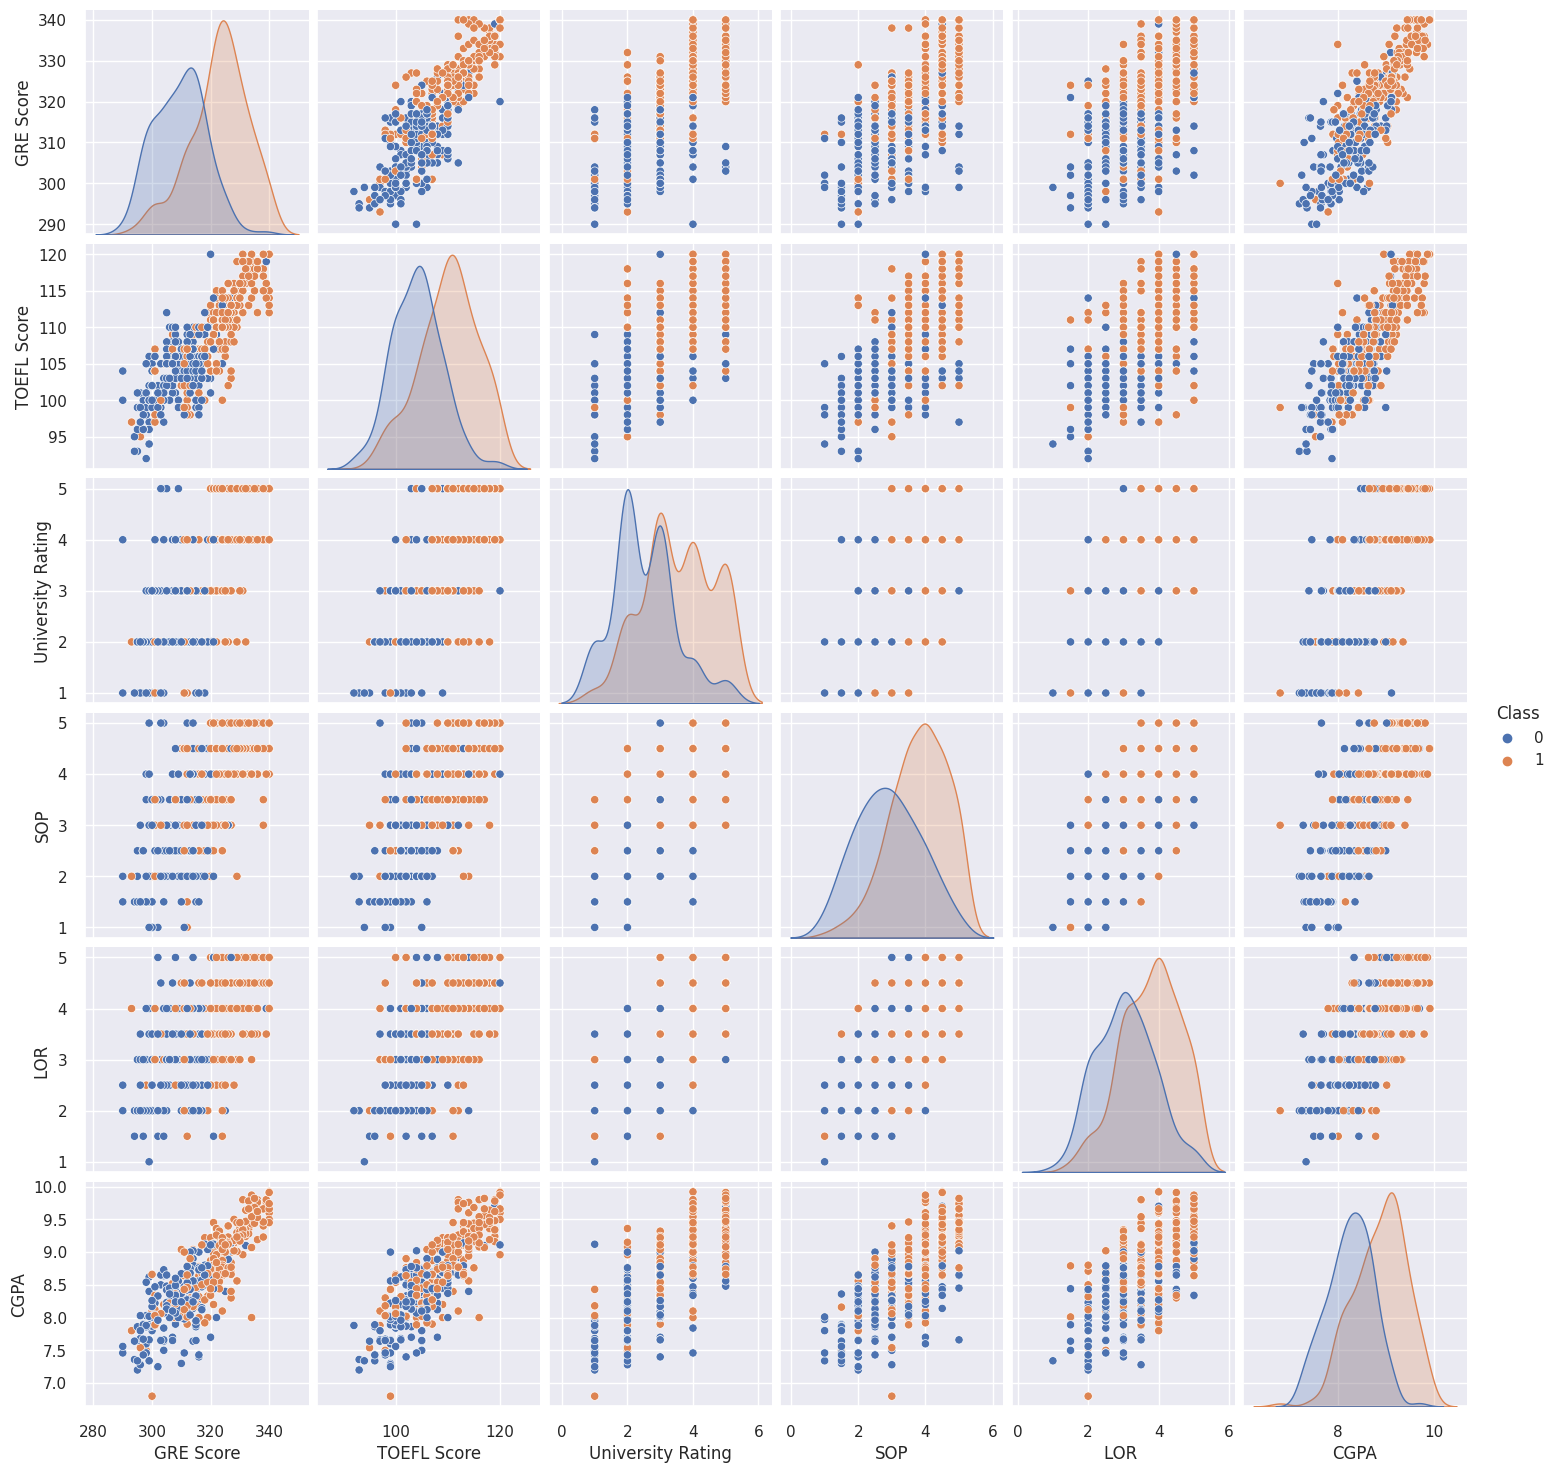

In [68]:
sns.pairplot(df, hue='Class')
plt.show()

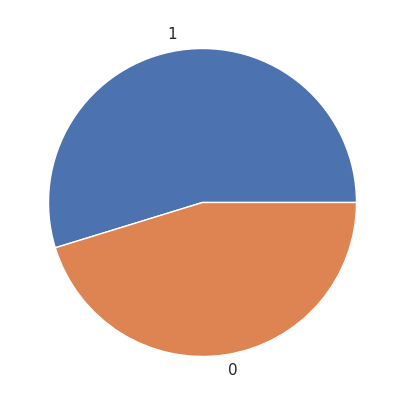

In [70]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [71]:
X = df.drop(columns=['Class'])
X.head(10)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA
0        337          118                  4  4.5   4.5  9.65
1        324          107                  4  4.0   4.5  8.87
2        316          104                  3  3.0   3.5  8.00
3        322          110                  3  3.5   2.5  8.67
4        314          103                  2  2.0   3.0  8.21
5        330          115                  5  4.5   3.0  9.34
6        321          109                  3  3.0   4.0  8.20
7        308          101                  2  3.0   4.0  7.90
8        302          102                  1  2.0   1.5  8.00
9        323          108                  3  3.5   3.0  8.60

In [72]:
X.describe().transpose()

count        mean        std    min     25%     50%  \
GRE Score          400.0  316.807500  11.473646  290.0  308.00  317.00   
TOEFL Score        400.0  107.410000   6.069514   92.0  103.00  107.00   
University Rating  400.0    3.087500   1.143728    1.0    2.00    3.00   
SOP                400.0    3.400000   1.006869    1.0    2.50    3.50   
LOR                400.0    3.452500   0.898478    1.0    3.00    3.50   
CGPA               400.0    8.598925   0.596317    6.8    8.17    8.61   

                        75%     max  
GRE Score          325.0000  340.00  
TOEFL Score        112.0000  120.00  
University Rating    4.0000    5.00  
SOP                  4.0000    5.00  
LOR                  4.0000    5.00  
CGPA                 9.0625    9.92

**Standardize the Data**

In [73]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA
0   1.762107     1.746971           0.798829  1.093864  1.167321  1.764818
1   0.627656    -0.067635           0.798829  0.596653  1.167321  0.455151
2  -0.070467    -0.562528          -0.076600 -0.397769  0.052933 -1.005631
3   0.453126     0.427257          -0.076600  0.099442 -1.061454  0.119339
4  -0.244998    -0.727492          -0.952029 -1.392191 -0.504260 -0.653029
5   1.151249     1.252078           1.674257  1.093864 -0.504260  1.244310
6   0.365860     0.262293          -0.076600 -0.397769  0.610127 -0.669819
7  -0.768590    -1.057420          -0.952029 -0.397769  0.610127 -1.173537
8  -1.292182    -0.892456          -1.827457 -1.392191 -2.175842 -1.005631
9   0.540391     0.097329          -0.076600  0.099442 -0.504260  0.001805

In [74]:
X.describe().transpose()

count          mean       std       min       25%  \
GRE Score          400.0 -4.174439e-16  1.001252 -2.339367 -0.768590   
TOEFL Score        400.0  5.595524e-16  1.001252 -2.542098 -0.727492   
University Rating  400.0  7.105427e-17  1.001252 -1.827457 -0.952029   
SOP                400.0  7.993606e-17  1.001252 -2.386613 -0.894980   
LOR                400.0 -1.332268e-16  1.001252 -2.733036 -0.504260   
CGPA               400.0  7.771561e-16  1.001252 -3.020504 -0.720191   

                        50%       75%       max  
GRE Score          0.016799  0.714922  2.023903  
TOEFL Score       -0.067635  0.757186  2.076899  
University Rating -0.076600  0.798829  1.674257  
SOP                0.099442  0.596653  1.591075  
LOR                0.052933  0.610127  1.724515  
CGPA               0.018596  0.778370  2.218165

**Observations and variables**

In [75]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

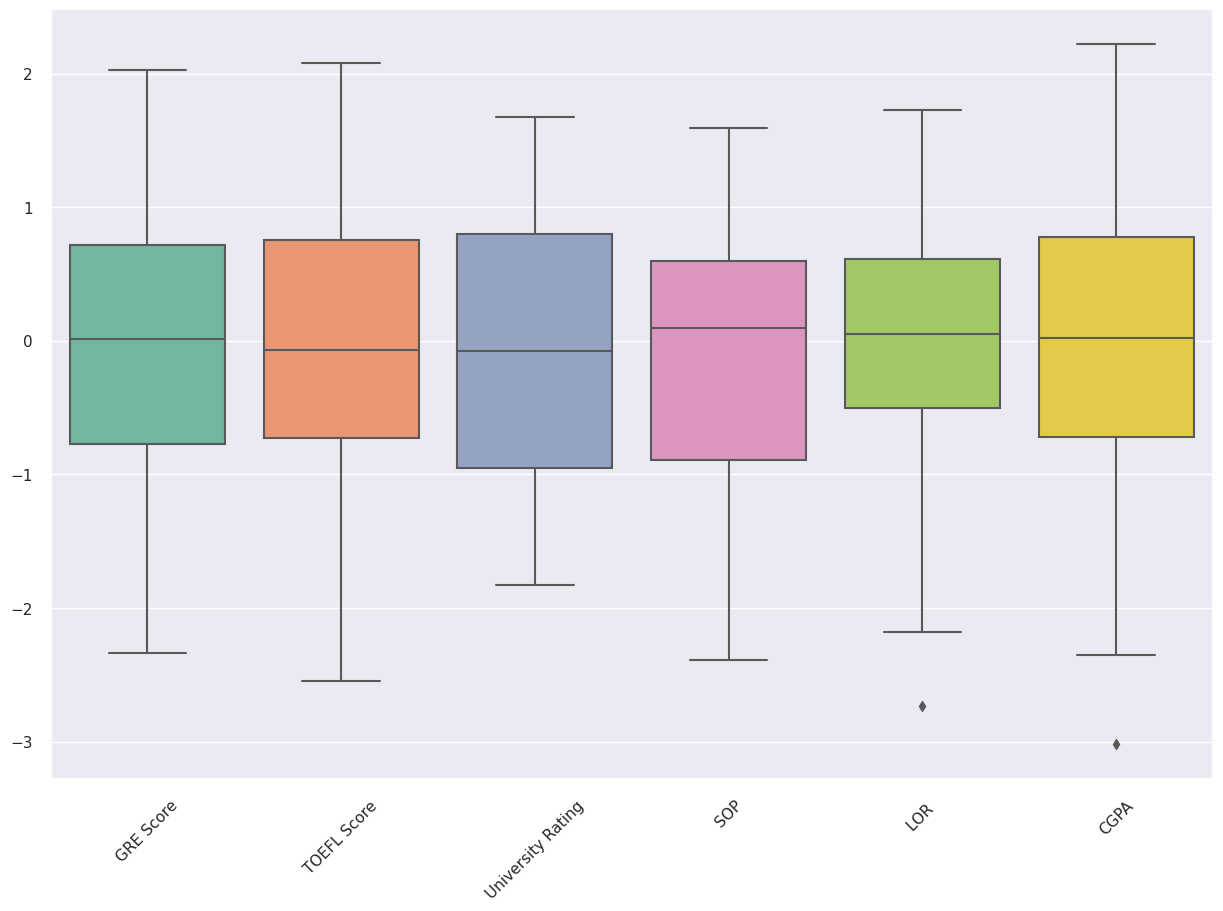

In [76]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

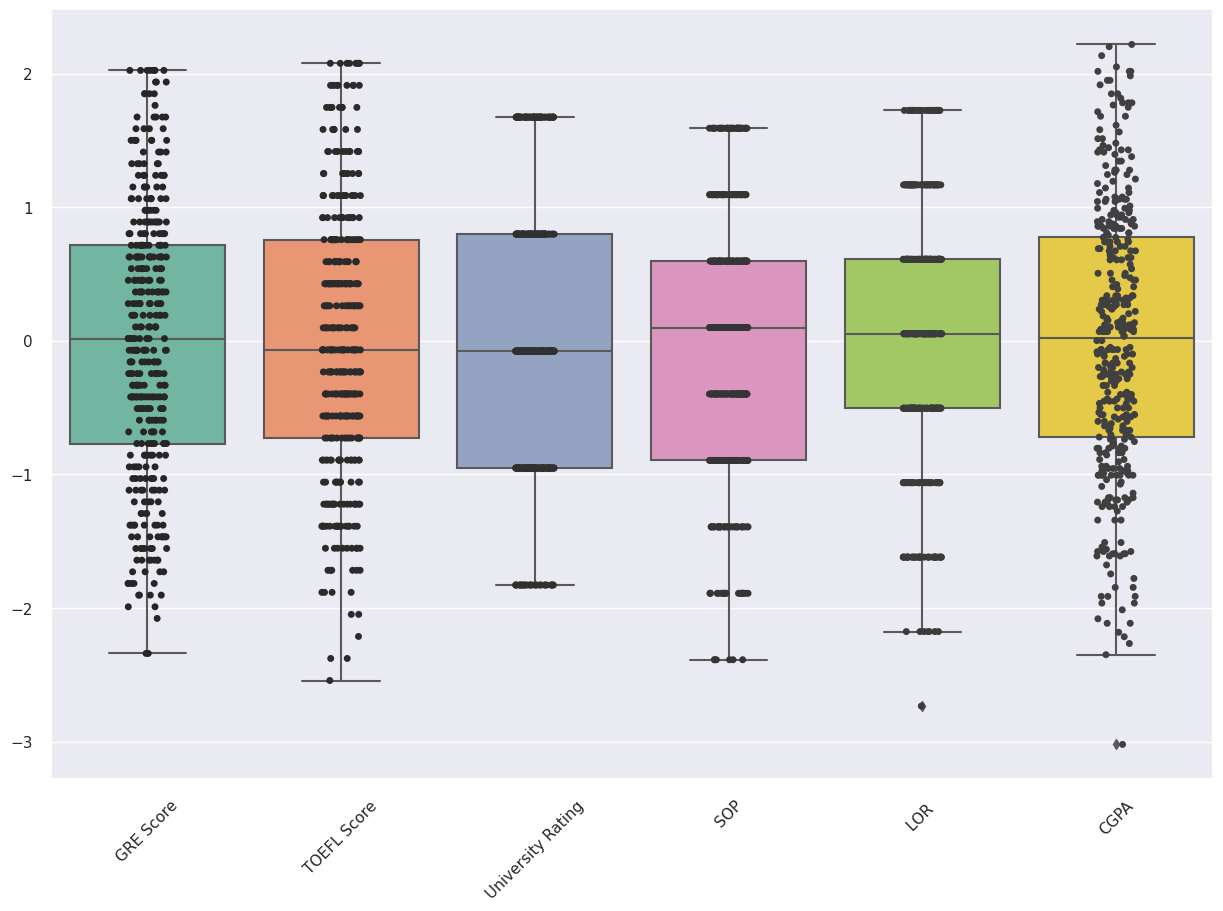

In [77]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

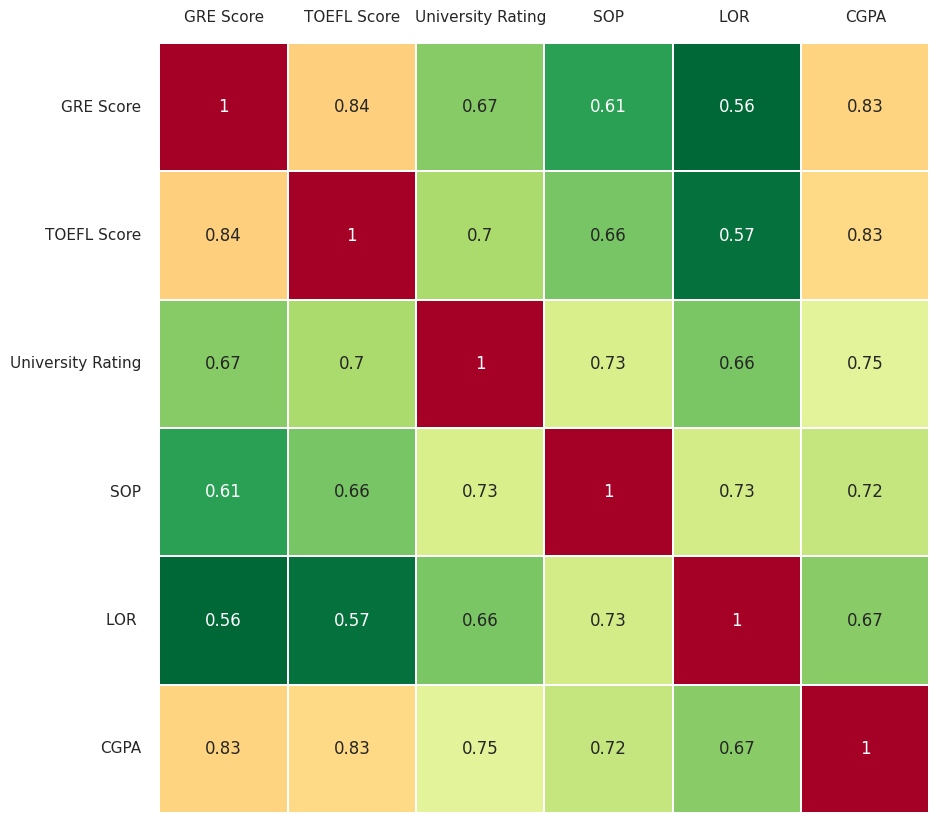

In [78]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

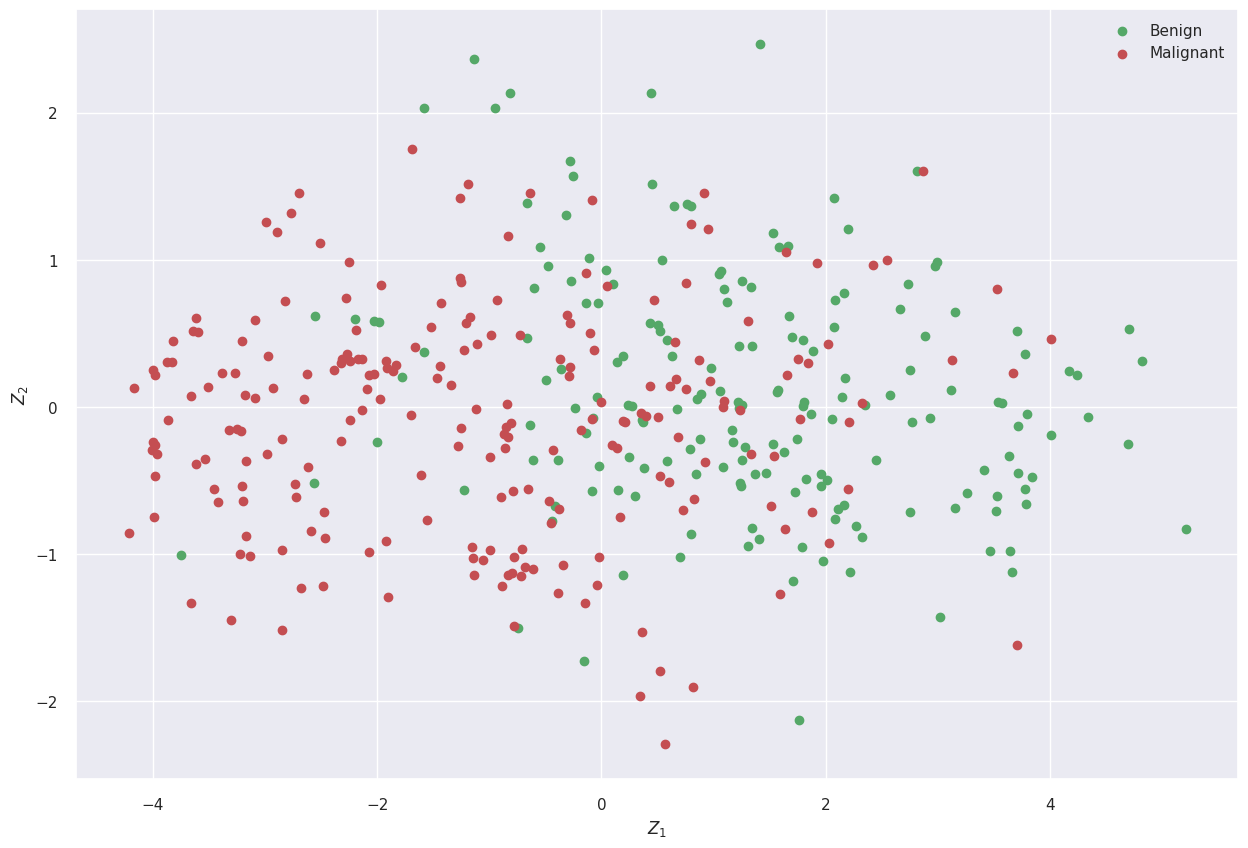

In [79]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-0.40972921, -0.4816369 , -0.20745122, -0.05744106, -0.43137973,
         0.60640243],
       [-0.41680582, -0.41536322, -0.04859444,  0.16282586,  0.78880339,
        -0.0515929 ],
       [-0.4076157 ,  0.16585919,  0.73610927, -0.50737459,  0.02722982,
         0.07945362],
       [-0.40174434,  0.41815237,  0.20637539,  0.76921991, -0.13090318,
         0.11101519],
       [-0.375472  ,  0.59358768, -0.5956148 , -0.34581901,  0.15483634,
         0.09139132],
       [-0.43573683, -0.20197099, -0.12408841, -0.03833054, -0.38710378,
        -0.77628902]])

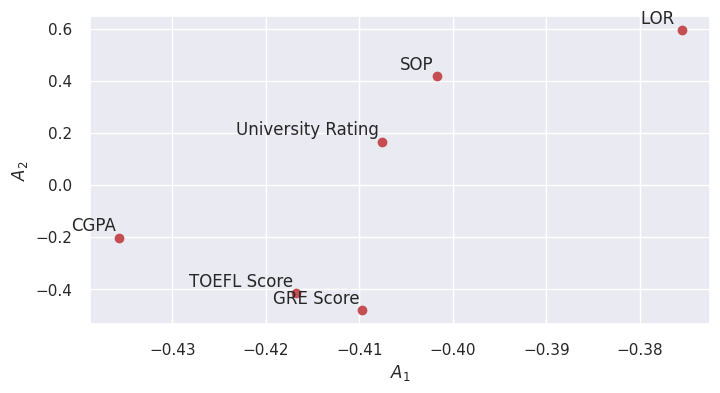

In [80]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

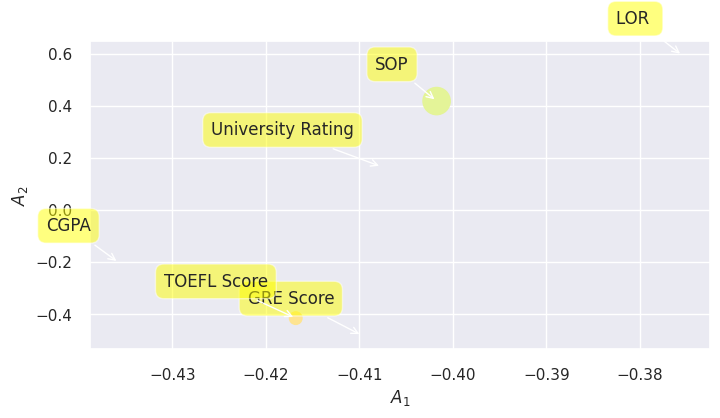

In [81]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.52501757, 0.62226194, 0.31229207, 0.24585335, 0.16294382,
       0.14666885])

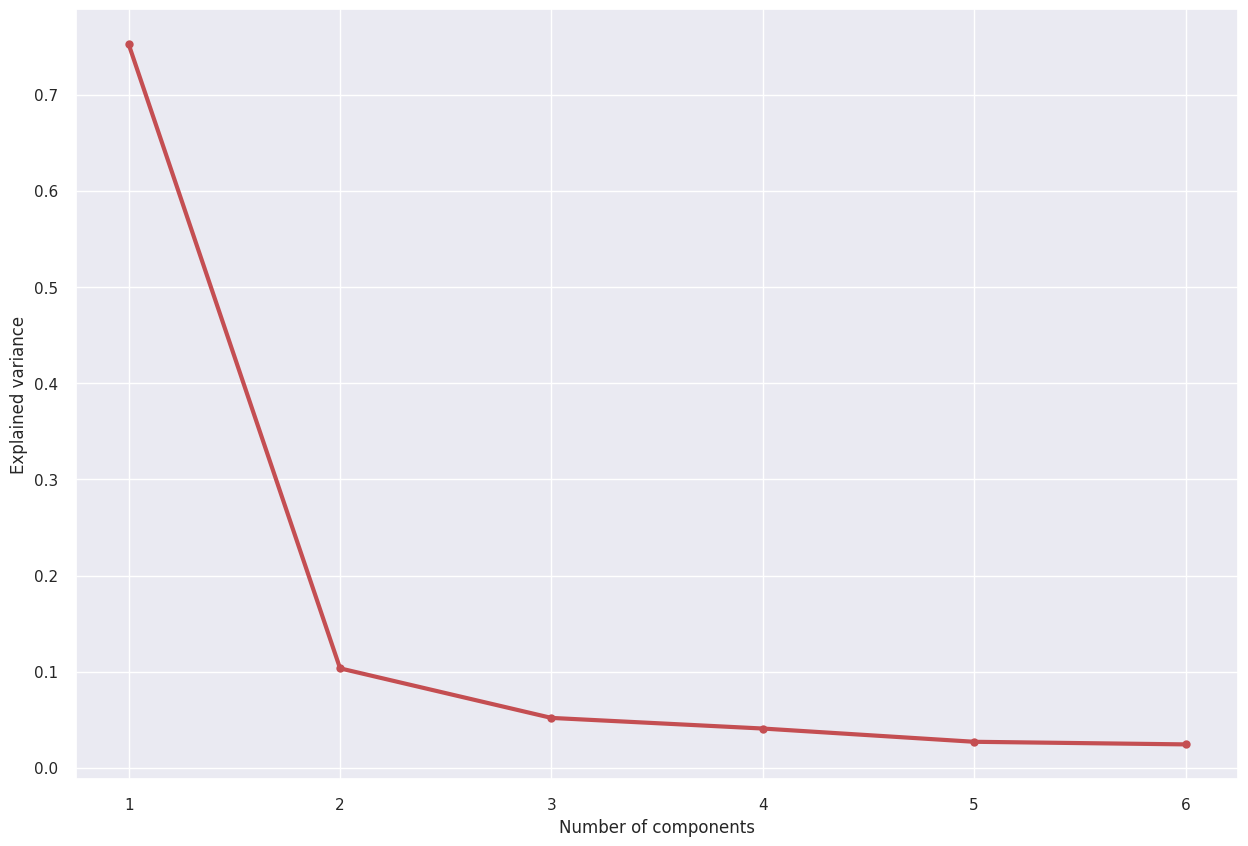

In [82]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

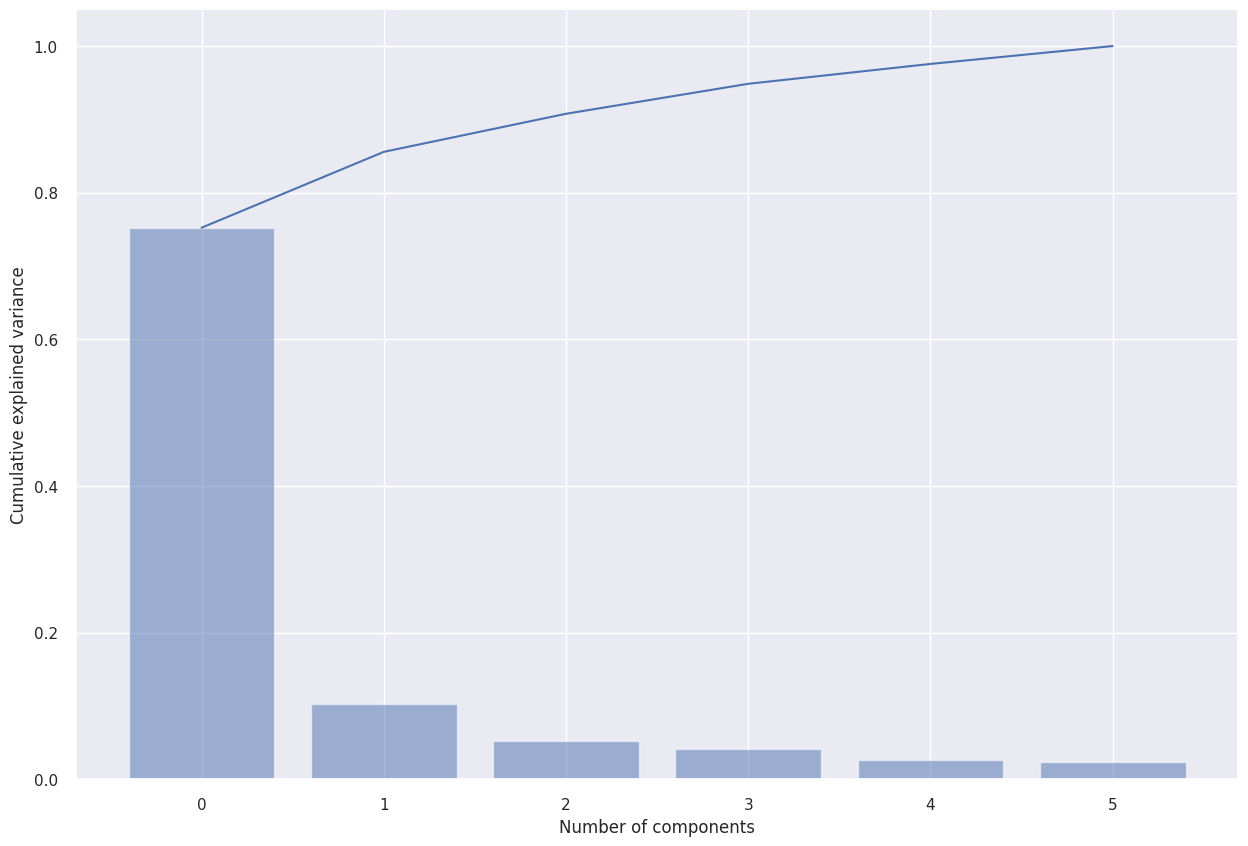

In [83]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [84]:
print("Values of Scree Plot in Percentage")
print(ell.round(4)*100)

Values of Scree Plot in Percentage
[75.23 10.35  5.19  4.09  2.71  2.44]


**Biplot**

array([-0.6479626 ,  0.70875585,  0.32308896, -1.02100103, -0.48730723,
       -0.89009548,  0.03325663,  1.0843487 , -0.98063693, -0.57150925,
        0.2107815 ,  0.26449913,  0.1200367 ,  0.44383735, -0.31890442,
       -0.21668392, -0.07680995,  0.14503465, -0.35831249,  0.71412798,
       -0.67266834, -1.72306465,  0.60206912, -0.25424018, -1.44951954,
       -0.74893947,  0.37113574,  0.22989971,  0.53229579, -0.60590232,
        0.9653597 ,  0.57410329, -1.22894236, -0.87647253,  0.23250225,
        1.45116778,  1.36627978, -1.11938883, -0.68487691,  0.79963938,
        0.1253771 , -0.82785005, -1.27127929, -0.51351797,  0.05620511,
        0.73953262,  0.34908335, -1.00304474,  0.61370441, -0.27859132,
        1.21214041,  0.03027451, -1.02542157, -0.69569454, -0.34021278,
       -0.00551892, -0.08296139,  0.8362739 ,  0.46249279, -1.12174433,
        0.3815274 ,  0.92417348,  0.21516618, -0.07012306, -0.77220858,
       -0.56222751, -1.50109149, -0.03679685,  0.02135341, -0.22

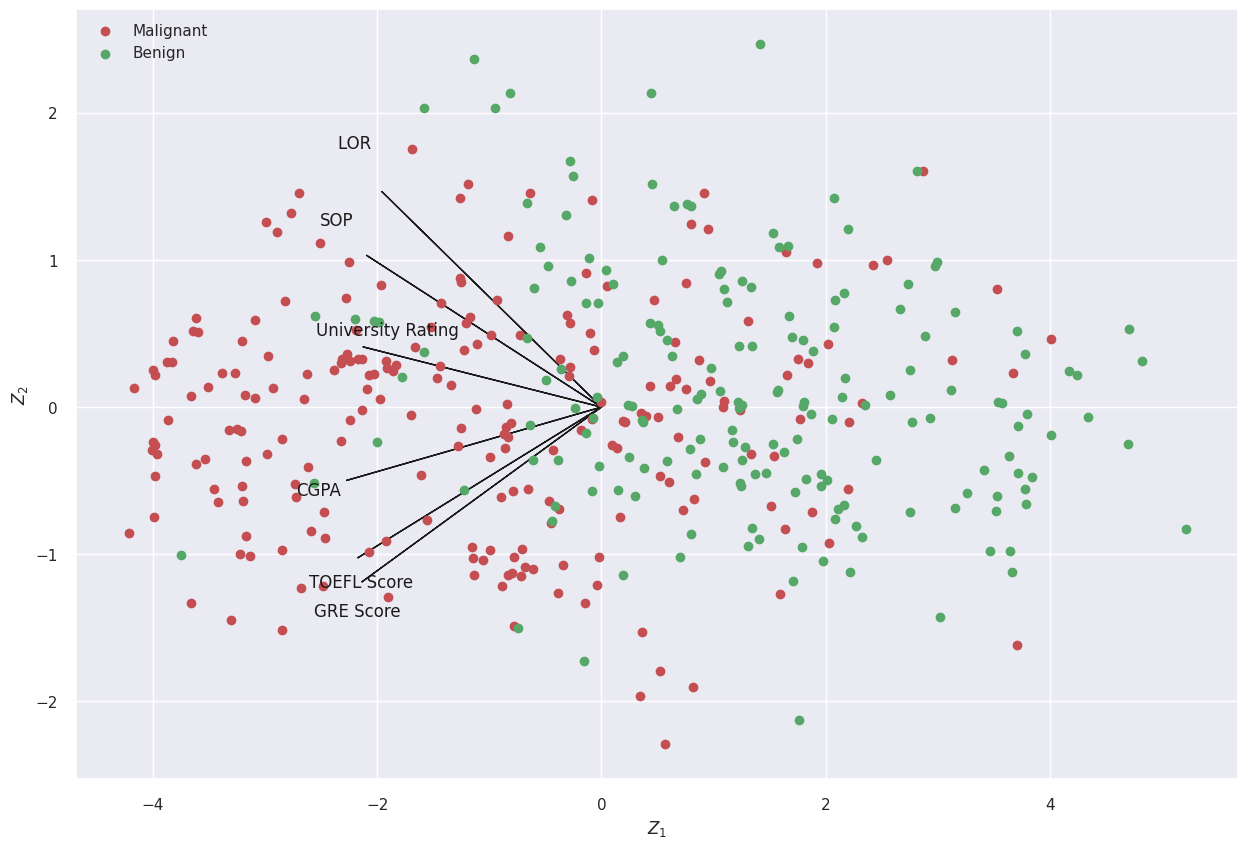

In [85]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [86]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [88]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0   -3.422496 -0.647963 -0.550940  0.148023 -0.005983
1   -1.430918  0.708756 -0.167514 -0.414542 -0.375908
2    0.872677  0.323089 -0.003262 -0.334412  0.034137
3   -0.025923 -1.021001  0.466782  0.521395 -0.084099
4    1.824856 -0.487307 -0.520556 -0.492834 -0.137131
..        ...       ...       ...       ...       ...
395 -0.786557 -0.569050 -0.310261  0.102180 -0.227329
396 -0.467501 -0.637168 -0.421512 -0.370383 -0.635758
397 -3.088119  0.059023 -0.263901  0.524727  0.062188
398  0.104824  0.833869 -0.314608 -0.201646 -0.431199
399 -3.208574 -0.537546 -0.038109  0.715723 -0.143389

[400 rows x 5 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (75.2% expl.var)', ylabel='PC2 (10.3% expl.var)'>)

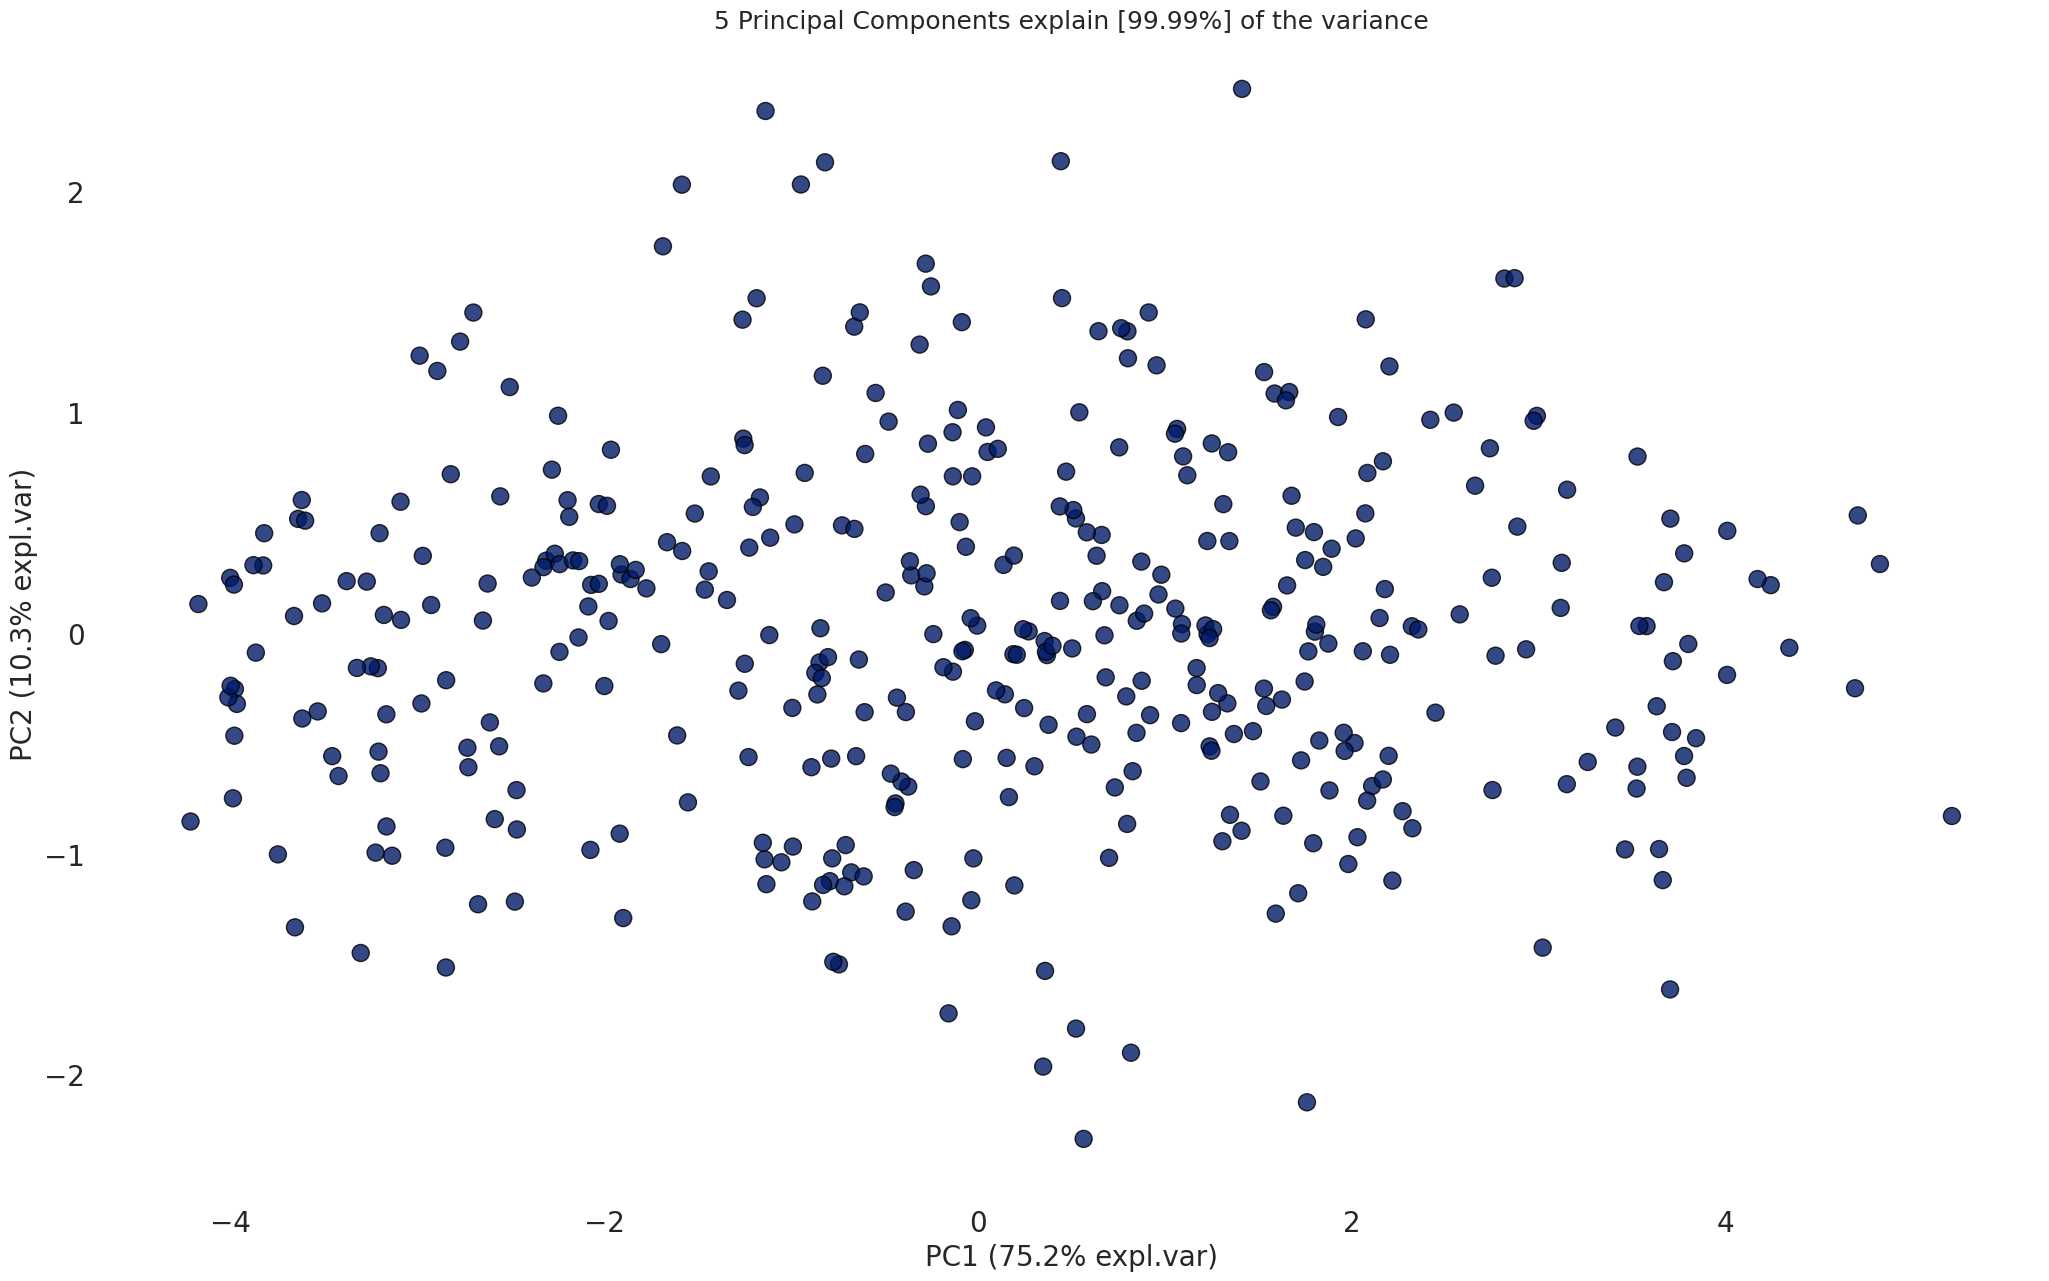

In [89]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [90]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5
GRE Score         -0.409729 -0.481637 -0.207451 -0.057441 -0.431380
TOEFL Score       -0.416806 -0.415363 -0.048594  0.162826  0.788803
University Rating -0.407616  0.165859  0.736109 -0.507375  0.027230
SOP               -0.401744  0.418152  0.206375  0.769220 -0.130903
LOR               -0.375472  0.593588 -0.595615 -0.345819  0.154836
CGPA              -0.435737 -0.201971 -0.124088 -0.038331 -0.387104

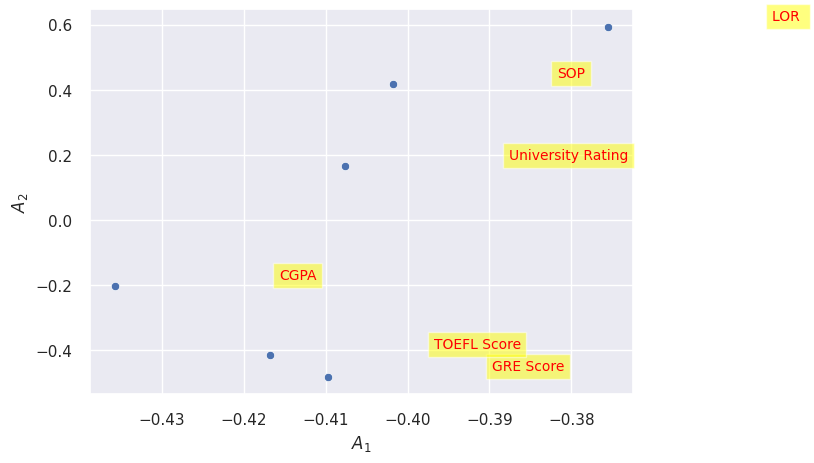

In [91]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

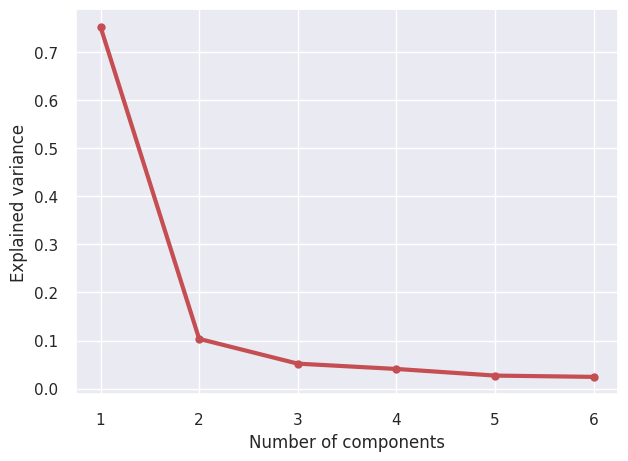

In [92]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

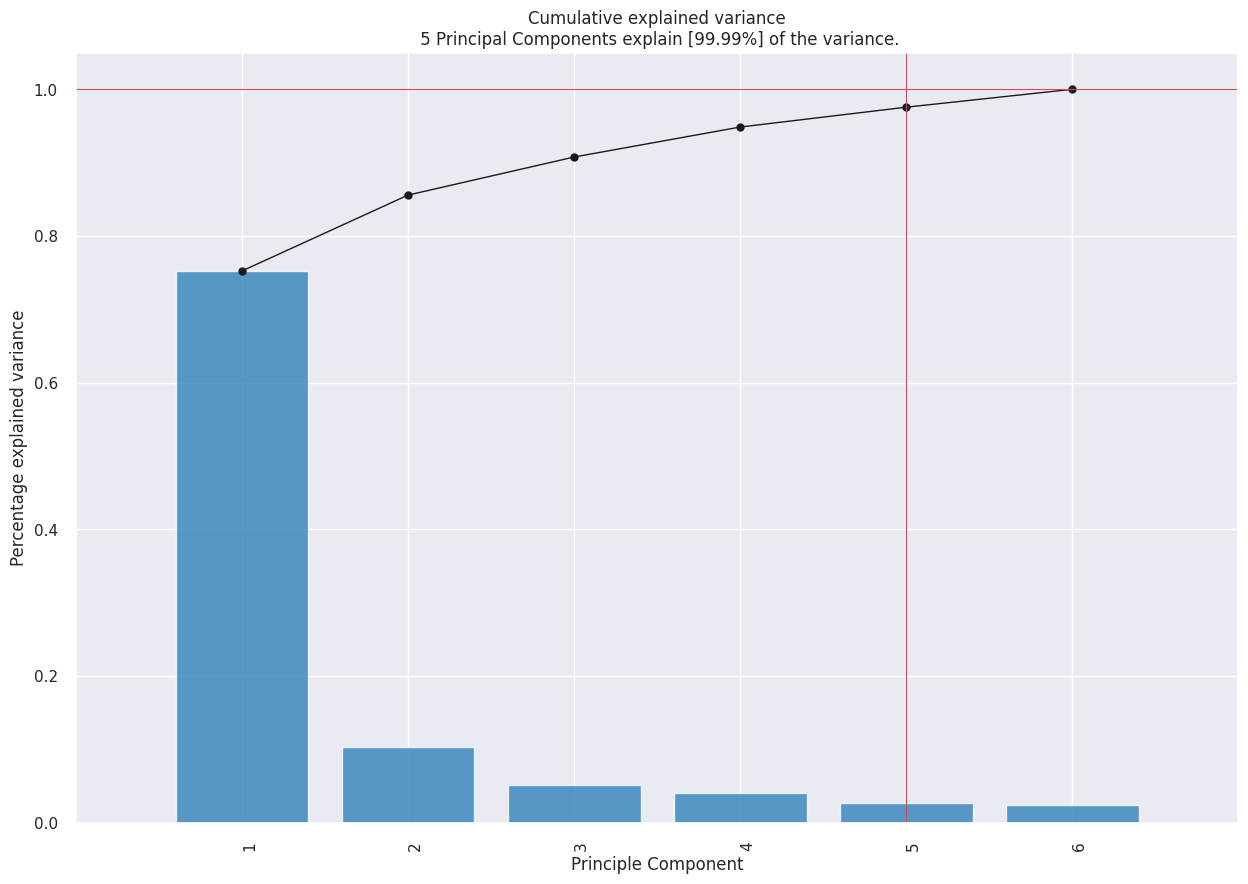

<Figure size 700x500 with 0 Axes>

In [93]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


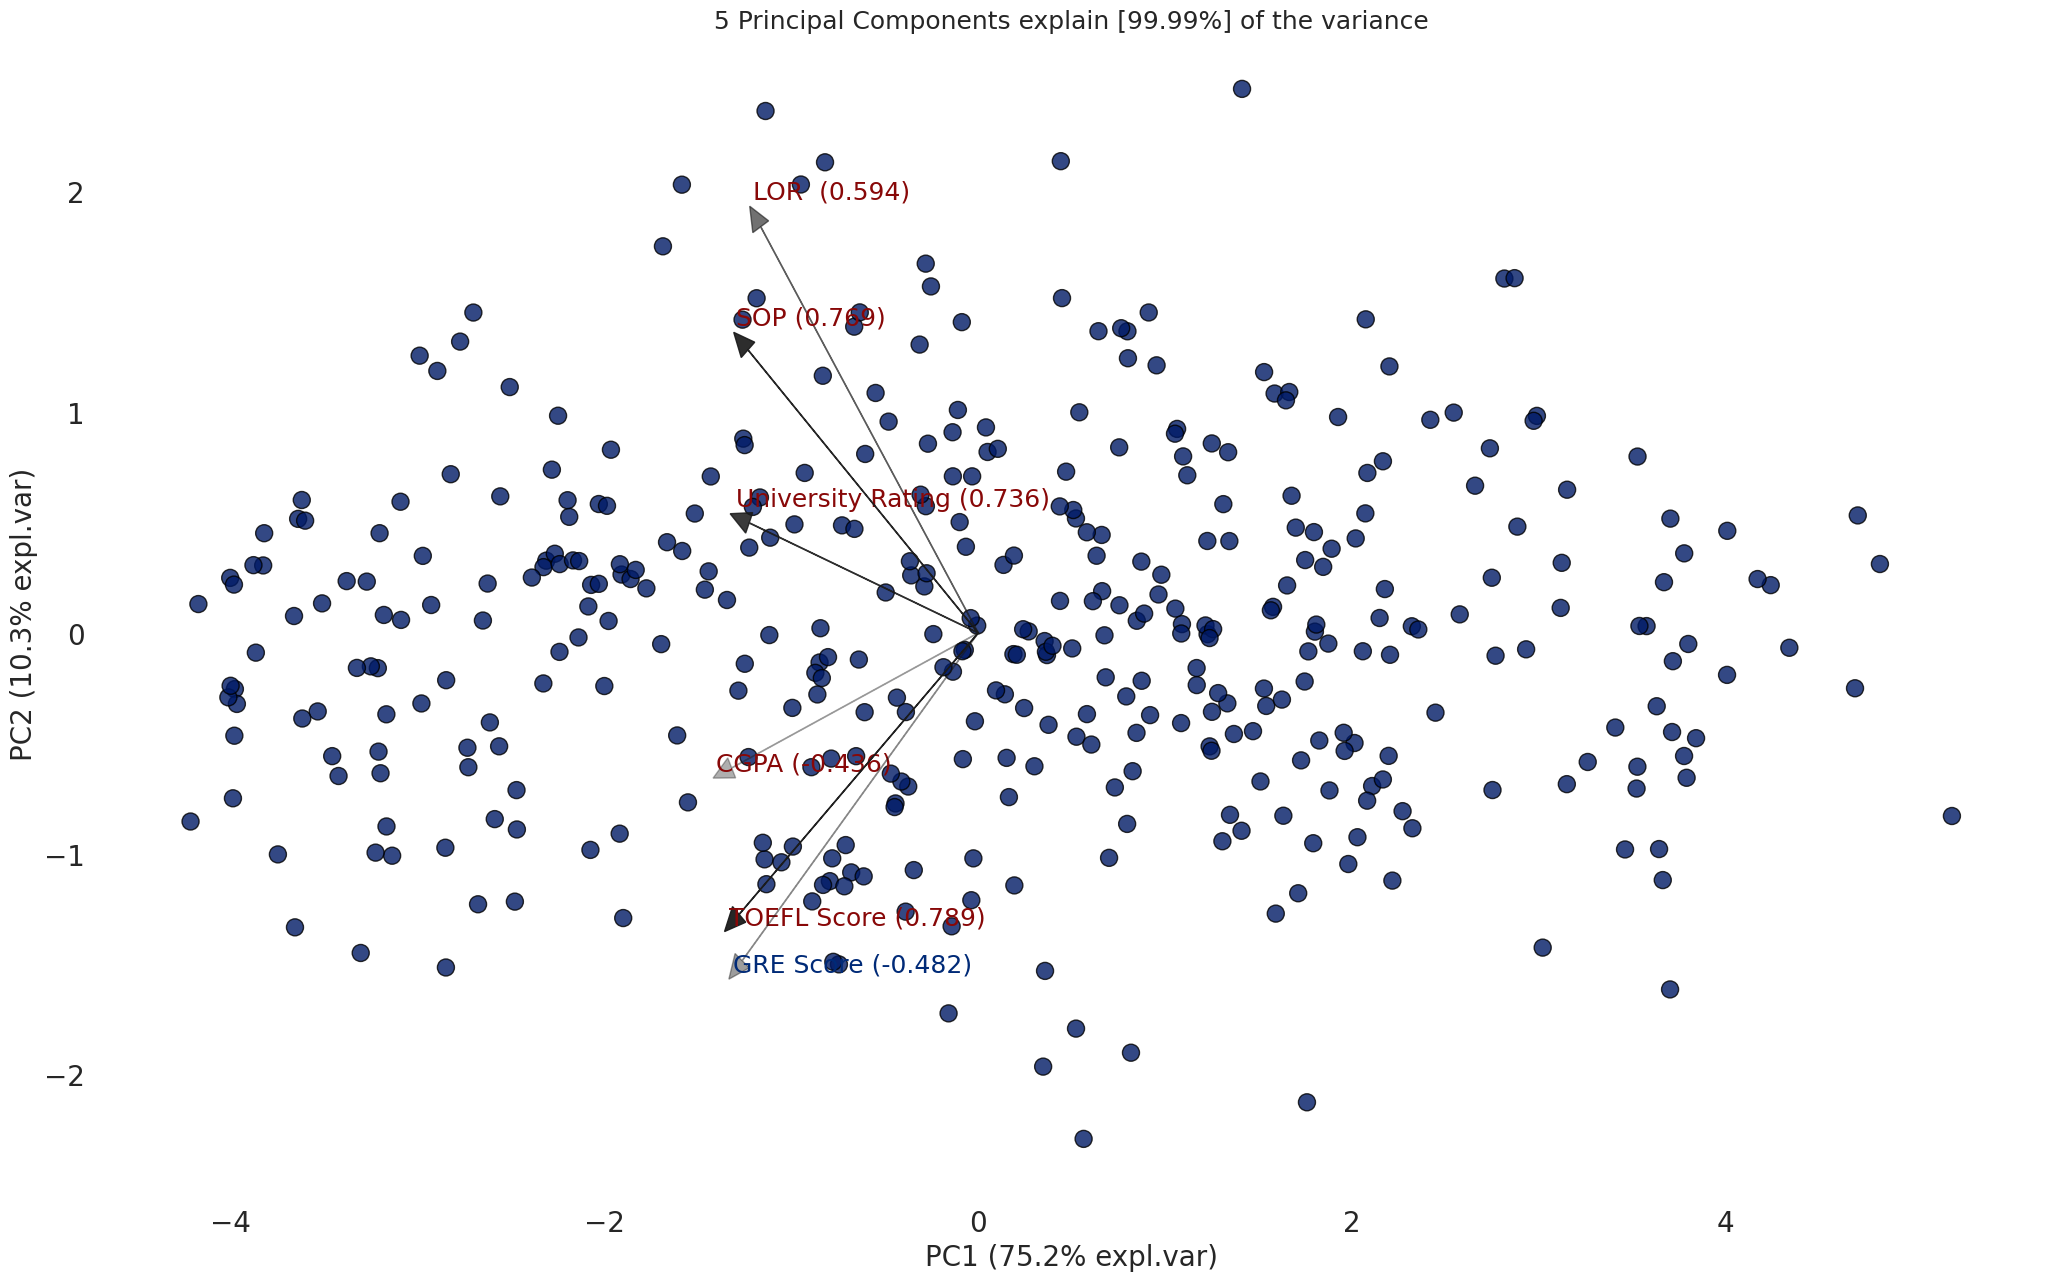

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (75.2% expl.var)', ylabel='PC2 (10.3% expl.var)'>)

In [94]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


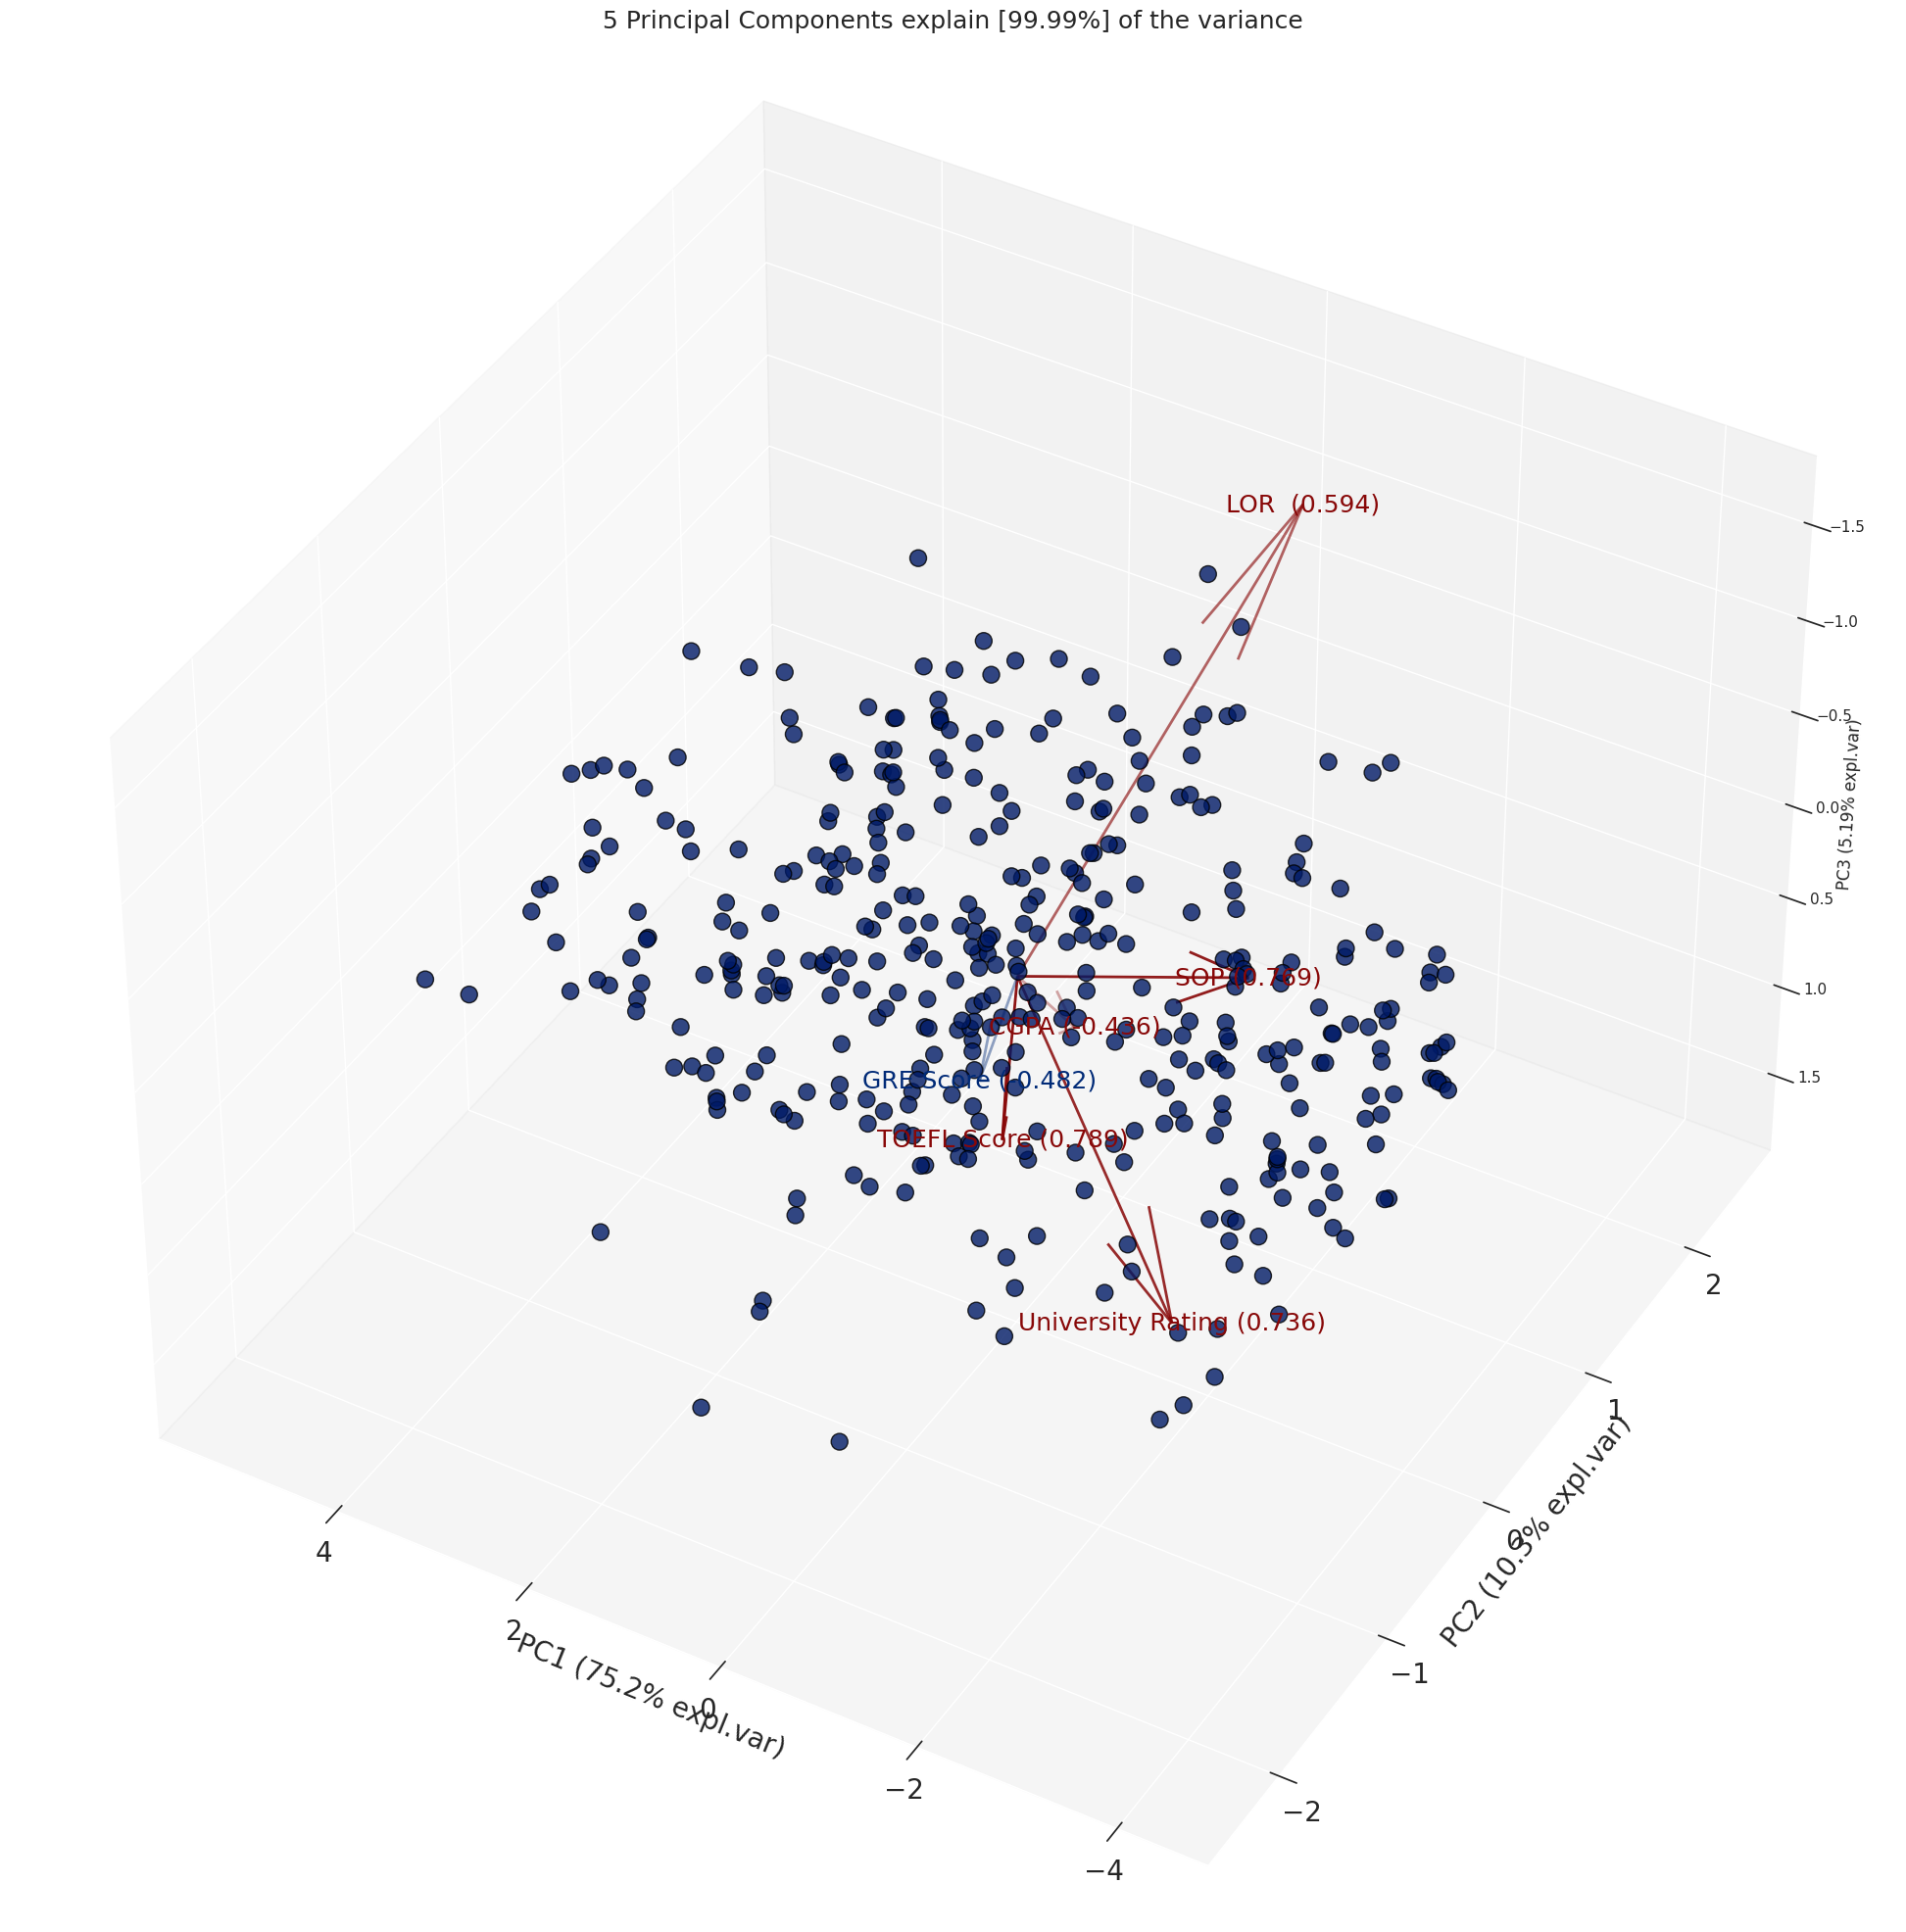

(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '5 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (75.2% expl.var)', ylabel='PC2 (10.3% expl.var)', zlabel='PC3 (5.19% expl.var)'>)

In [95]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [96]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [123]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

ImportError: ignored

In [98]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (360, 7)
Unseen Data For Predictions: (40, 7)


In [99]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

**Comparing All Models**

In [100]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [101]:
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

 Create a Model

**Logistic Regresssion**

In [102]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [103]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [122]:
!pip install "schemdraw<0.16"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

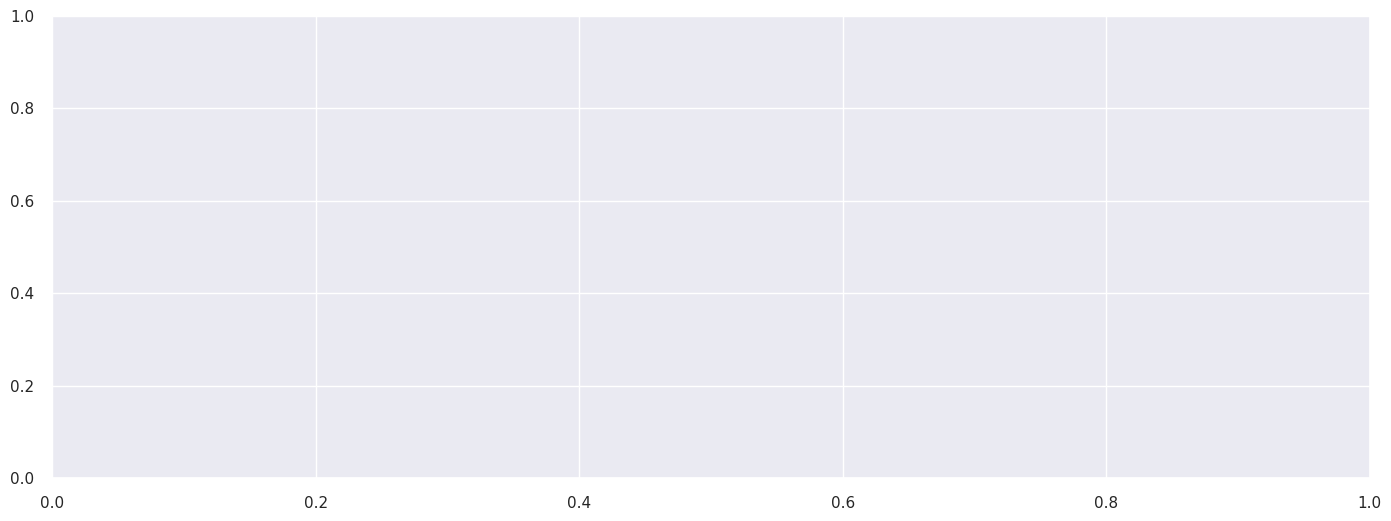

In [126]:
evaluate_model(tuned_lr)

**Create model with K-nearest neighbour**

In [127]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [128]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

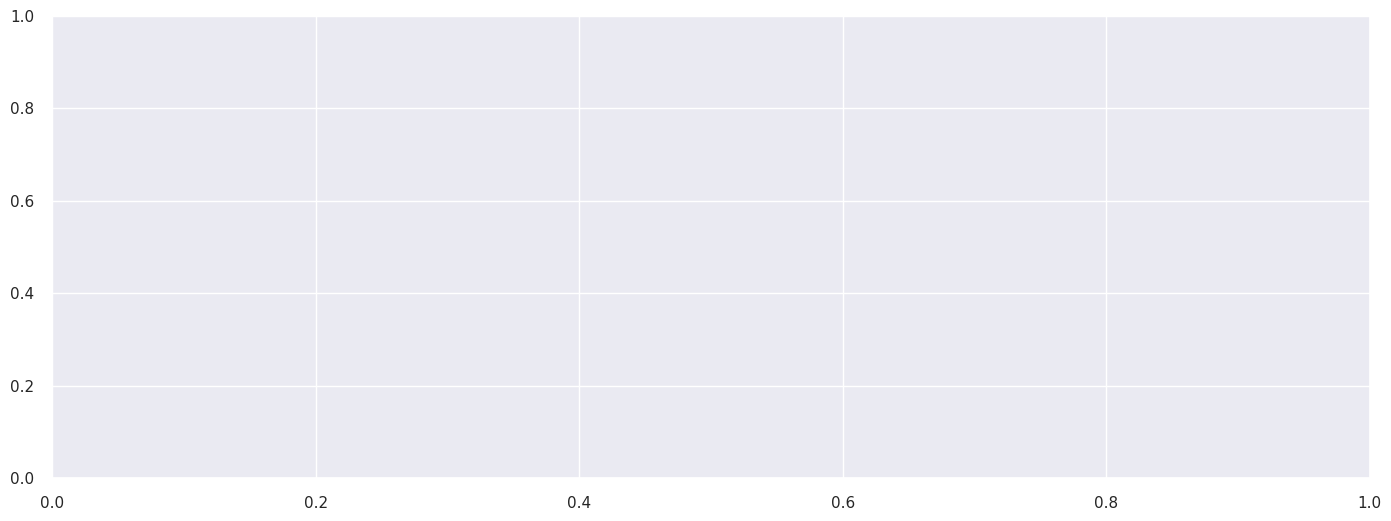

In [129]:
evaluate_model(tuned_knn)

**Create model with Quadratic Discriminant Analysis**

In [130]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [131]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate QDA Model**

In [ ]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.66,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (360, 7)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (251, 3)
12                    Transformed Test Set          (109, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f1a4
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Class')),
                ('fix_perfect', Remove_100(target='Class')),
                ('clean_names', Clean_Colum_Names()),
       

# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.7648  0.8411  0.7984  0.7710   
ada                  Ada Boost Classifier    0.7571  0.8240  0.7538  0.7845   
nb                            Naive Bayes    0.7568  0.8347  0.7835  0.7692   
ridge                    Ridge Classifier    0.7568  0.0000  0.7912  0.7656   
lda          Linear Discriminant Analysis    0.7568  0.8397  0.7912  0.7656   
qda       Quadratic Discriminant Analysis    0.7528  0.8422  0.7538  0.7817   
gbc          Gradient Boosting Classifier    0.7451  0.8247  0.7692  0.7635   
lightgbm  Light Gradient Boosting Machine    0.7369  0.8030  0.7385  0.7701   
svm                   SVM - Linear Kernel    0.7368  0.0000  0.6780  0.8014   
rf               Random Forest Classifier    0.7249  0.8196  0.7456  0.7420   
et                 Extra Trees Classifier    0.7249  0.8166  0.7099  0.7684   
knn                K Neighbors Classifier    0.7246  0.7962  0.7236  0.7603   
dt               Decision Tree Classifier    0.7212  0.7231  0.7082  0.7648   
xgboost         Extreme Gradient Boosting    0.7168  0.7748  0.7313  0.7430   
dummy                    Dummy Classifier    0.5338  0.5000  1.0000  0.5338   

              F1   Kappa     MCC  TT (Sec)  
lr        0.7828  0.5255  0.5284     0.037  
ada       0.7668  0.5130  0.5163     0.275  
nb        0.7734  0.5102  0.5142     0.029  
ridge     0.7760  0.5098  0.5132     0.021  
lda       0.7760  0.5098  0.5132     0.033  
qda       0.7637  0.5036  0.5088     0.027  
gbc       0.7620  0.4876  0.4934     0.225  
lightgbm  0.7471  0.4717  0.4805     0.040  
svm       0.7244  0.4765  0.4890     0.026  
rf        0.7407  0.4465  0.4507     0.439  
et        0.7306  0.4507  0.4602     0.313  
knn       0.7325  0.4493  0.4583     0.079  
dt        0.7298  0.4427  0.4508     0.027  
xgboost   0.7300  0.4319  0.4406     0.081  
dummy     0.6959  0.0000  0.0000     0.012

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# **Best model with PCA**

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8077  0.8929  0.8571  0.8000  0.8276  0.6108  0.6126
1       0.7200  0.8013  0.6154  0.8000  0.6957  0.4444  0.4576
2       0.7200  0.8846  0.7692  0.7143  0.7407  0.4373  0.4387
3       0.8000  0.8269  0.7692  0.8333  0.8000  0.6006  0.6026
4       0.8000  0.8397  0.7692  0.8333  0.8000  0.6006  0.6026
5       0.6800  0.8333  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9744  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.6800  0.7597  0.6429  0.7500  0.6923  0.3631  0.3677
8       0.7600  0.7987  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.7600  0.8377  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7648  0.8449  0.7758  0.7856  0.7779  0.5268  0.5304
SD      0.0684  0.0570  0.0887  0.0676  0.0668  0.1370  0.1353

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
lr_pca = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8077  0.8869  0.8571  0.8000  0.8276  0.6108  0.6126
1       0.6800  0.7692  0.6154  0.7273  0.6667  0.3631  0.3677
2       0.7600  0.8846  0.8462  0.7333  0.7857  0.5161  0.5230
3       0.8000  0.8333  0.8462  0.7857  0.8148  0.5981  0.6000
4       0.7600  0.8333  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.8205  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9808  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.7200  0.7662  0.7143  0.7692  0.7407  0.4373  0.4387
8       0.7600  0.7987  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.7600  0.8377  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7648  0.8411  0.7984  0.7710  0.7828  0.5255  0.5284
SD      0.0661  0.0605  0.0833  0.0625  0.0657  0.1324  0.1312

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [ ]:
tuned_lr_pca = tune_model(lr_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8077  0.8929  0.8571  0.8000  0.8276  0.6108  0.6126
1       0.7200  0.8013  0.6154  0.8000  0.6957  0.4444  0.4576
2       0.7200  0.8846  0.7692  0.7143  0.7407  0.4373  0.4387
3       0.8000  0.8269  0.7692  0.8333  0.8000  0.6006  0.6026
4       0.8000  0.8397  0.7692  0.8333  0.8000  0.6006  0.6026
5       0.6800  0.8333  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9744  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.6800  0.7597  0.6429  0.7500  0.6923  0.3631  0.3677
8       0.7600  0.7987  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.7600  0.8377  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7648  0.8449  0.7758  0.7856  0.7779  0.5268  0.5304
SD      0.0684  0.0570  0.0887  0.0676  0.0668  0.1370  0.1353

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [ ]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

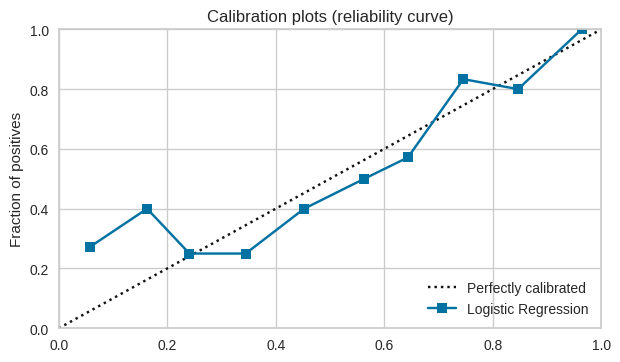

In [ ]:
evaluate_model(tuned_lr_pca)

# **Create K-nearest neighbour Model**

In [ ]:
knn_pca = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8929  0.8571  0.8571  0.8571  0.6905  0.6905
1       0.6800  0.7821  0.6154  0.7273  0.6667  0.3631  0.3677
2       0.6800  0.7853  0.6923  0.6923  0.6923  0.3590  0.3590
3       0.7600  0.8301  0.8462  0.7333  0.7857  0.5161  0.5230
4       0.6400  0.7083  0.6154  0.6667  0.6400  0.2812  0.2821
5       0.6000  0.6763  0.6923  0.6000  0.6429  0.1935  0.1961
6       0.8800  0.9103  0.8462  0.9167  0.8800  0.7604  0.7628
7       0.6400  0.7370  0.4286  0.8571  0.5714  0.3161  0.3733
8       0.7200  0.7792  0.8571  0.7059  0.7742  0.4147  0.4284
9       0.8000  0.8604  0.7857  0.8462  0.8148  0.5981  0.6000
Mean    0.7246  0.7962  0.7236  0.7603  0.7325  0.4493  0.4583
SD      0.0893  0.0734  0.1349  0.0972  0.0986  0.1760  0.1723

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


# **Tune Model**

In [ ]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9167  0.9286  0.8125  0.8667  0.6867  0.6953
1       0.7600  0.8558  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.7200  0.8878  0.7692  0.7143  0.7407  0.4373  0.4387
3       0.8400  0.8526  0.8462  0.8462  0.8462  0.6795  0.6795
4       0.8000  0.8397  0.7692  0.8333  0.8000  0.6006  0.6026
5       0.6800  0.7949  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9647  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.6800  0.7987  0.6429  0.7500  0.6923  0.3631  0.3677
8       0.7600  0.8149  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.7600  0.8214  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7766  0.8547  0.7984  0.7900  0.7919  0.5500  0.5536
SD      0.0726  0.0517  0.0874  0.0694  0.0680  0.1456  0.1448

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [ ]:
evaluate_model(tuned_knn_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create Quadratic Discriminant Analysis Model**

In [ ]:
qda_pca = create_model('qda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8077  0.9167  0.7857  0.8462  0.8148  0.6154  0.6172
1       0.6800  0.7692  0.6154  0.7273  0.6667  0.3631  0.3677
2       0.7200  0.8910  0.6923  0.7500  0.7200  0.4409  0.4423
3       0.8000  0.8718  0.8462  0.7857  0.8148  0.5981  0.6000
4       0.8000  0.8205  0.7692  0.8333  0.8000  0.6006  0.6026
5       0.6800  0.8013  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.8800  0.9359  0.8462  0.9167  0.8800  0.7604  0.7628
7       0.6800  0.7857  0.5714  0.8000  0.6667  0.3750  0.3948
8       0.7200  0.8117  0.8571  0.7059  0.7742  0.4147  0.4284
9       0.7600  0.8182  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7528  0.8422  0.7538  0.7817  0.7637  0.5036  0.5088
SD      0.0646  0.0545  0.0930  0.0695  0.0662  0.1293  0.1263

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


# **Tune model**

In [ ]:
tuned_qda_pca = tune_model(qda_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9226  0.8571  0.8571  0.8571  0.6905  0.6905
1       0.7600  0.7885  0.6923  0.8182  0.7500  0.5223  0.5290
2       0.8400  0.9103  0.8462  0.8462  0.8462  0.6795  0.6795
3       0.8000  0.8590  0.8462  0.7857  0.8148  0.5981  0.6000
4       0.8000  0.8205  0.7692  0.8333  0.8000  0.6006  0.6026
5       0.6800  0.8013  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.8800  0.9551  0.8462  0.9167  0.8800  0.7604  0.7628
7       0.7200  0.7792  0.6429  0.8182  0.7200  0.4479  0.4610
8       0.7600  0.8052  0.8571  0.7500  0.8000  0.5033  0.5104
9       0.8000  0.8247  0.7857  0.8462  0.8148  0.5981  0.6000
Mean    0.7886  0.8466  0.7912  0.8138  0.7997  0.5756  0.5795
SD      0.0573  0.0588  0.0711  0.0644  0.0534  0.1153  0.1127

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Model**

In [ ]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [ ]:
evaluate_model(tuned_qda_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7692  0.8720  0.7143  0.8333  0.7692  0.5412  0.5476
1       0.8000  0.8109  0.6923  0.9000  0.7826  0.6032  0.6210
2       0.8400  0.8686  0.8462  0.8462  0.8462  0.6795  0.6795
3       0.6000  0.7628  0.6154  0.6154  0.6154  0.1987  0.1987
4       0.7200  0.7821  0.6923  0.7500  0.7200  0.4409  0.4423
5       0.6000  0.7404  0.6923  0.6000  0.6429  0.1935  0.1961
6       0.8800  0.9167  0.8462  0.9167  0.8800  0.7604  0.7628
7       0.6000  0.8052  0.4286  0.7500  0.5455  0.2331  0.2626
8       0.7600  0.7890  0.9286  0.7222  0.8125  0.4932  0.5241
9       0.6800  0.8182  0.6429  0.7500  0.6923  0.3631  0.3677
Mean    0.7249  0.8166  0.7099  0.7684  0.7306  0.4507  0.4602
SD      0.0975  0.0516  0.1336  0.1022  0.1017  0.1914  0.1906

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.9167  0.7857  0.9167  0.8462  0.6941  0.7024
1       0.7200  0.7885  0.6154  0.8000  0.6957  0.4444  0.4576
2       0.7600  0.8782  0.7692  0.7692  0.7692  0.5192  0.5192
3       0.8400  0.8590  0.8462  0.8462  0.8462  0.6795  0.6795
4       0.7600  0.8237  0.7692  0.7692  0.7692  0.5192  0.5192
5       0.6800  0.7756  0.7692  0.6667  0.7143  0.3548  0.3595
6       0.9200  0.9808  0.9231  0.9231  0.9231  0.8397  0.8397
7       0.6800  0.7597  0.6429  0.7500  0.6923  0.3631  0.3677
8       0.7600  0.8312  0.7857  0.7857  0.7857  0.5130  0.5130
9       0.7600  0.8377  0.7857  0.7857  0.7857  0.5130  0.5130
Mean    0.7726  0.8451  0.7692  0.8012  0.7828  0.5440  0.5471
SD      0.0723  0.0639  0.0837  0.0731  0.0697  0.1449  0.1437

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 11.2 MB/s eta 0:00:00


In [ ]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


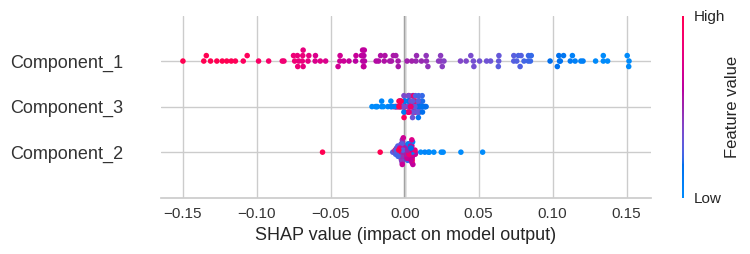

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
